In [27]:
import sys
!{sys.executable} -m pip install kaggle
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install matplotlib

     |████████████████████████████████| 11.6 MB 39 kB/s  eta 0:00:01    |██████████▏                     | 3.7 MB 5.2 MB/s eta 0:00:02     |██████████████▏                 | 5.1 MB 5.2 MB/s eta 0:00:02     |██████████████▋                 | 5.3 MB 5.2 MB/s eta 0:00:02     |████████████████████████▏       | 8.7 MB 2.1 MB/s eta 0:00:02     |████████████████████████████    | 10.1 MB 2.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 9.9 MB/s eta 0:00:01


In [5]:
# Zadanie 1
!kaggle datasets download -d szamil/who-suicide-statistics

  0%|                                                | 0.00/304k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 304k/304k [00:00<00:00, 17.9MB/s]


In [6]:
import pandas as pd
sc = pd.read_csv('who_suicide_statistics.csv')
sc

country  year     sex          age  suicides_no  population
0       Albania  1985  female  15-24 years          NaN    277900.0
1       Albania  1985  female  25-34 years          NaN    246800.0
2       Albania  1985  female  35-54 years          NaN    267500.0
3       Albania  1985  female   5-14 years          NaN    298300.0
4       Albania  1985  female  55-74 years          NaN    138700.0
...         ...   ...     ...          ...          ...         ...
43771  Zimbabwe  1990    male  25-34 years        150.0         NaN
43772  Zimbabwe  1990    male  35-54 years        132.0         NaN
43773  Zimbabwe  1990    male   5-14 years          6.0         NaN
43774  Zimbabwe  1990    male  55-74 years         74.0         NaN
43775  Zimbabwe  1990    male    75+ years         13.0         NaN

[43776 rows x 6 columns]

In [92]:
# Zadanie 2
# Podzial na 3 podzbiory w proporcji 6:2:2
import numpy as np
train, validate, test = np.split(sc.sample(frac=1, random_state=42),
                                 [int(.6*len(sc)), int(.8*len(sc))])


In [76]:
# Zadanie 3
import matplotlib.pyplot as plt
print("Train set: ", train.size)
print("Validate set: ", validate.size)
print("Test set: ", test.size)
print(train.describe(include='all'))
print(train.country.value_counts())

Train set:  157590
Validate set:  52530
Test set:  52536
                         country          year     sex          age  \
count                      26265  26265.000000   26265        26265   
unique                       141           NaN       2            6   
top     United States of America           NaN  female  55-74 years   
freq                         298           NaN   13170         4420   
mean                         NaN   1998.562688     NaN          NaN   
std                          NaN     10.310004     NaN          NaN   
min                          NaN   1979.000000     NaN          NaN   
25%                          NaN   1990.000000     NaN          NaN   
50%                          NaN   1999.000000     NaN          NaN   
75%                          NaN   2007.000000     NaN          NaN   
max                          NaN   2016.000000     NaN          NaN   

         suicides_no    population  
count   24919.000000  2.298300e+04  
unique          

In [77]:
# Zadanie 3
print(validate.describe(include='all'))
print(validate.country.value_counts())

          country         year   sex         age   suicides_no    population
count        8755  8755.000000  8755        8755   8299.000000  7.707000e+03
unique        141          NaN     2           6           NaN           NaN
top     Mauritius          NaN  male  5-14 years           NaN           NaN
freq          108          NaN  4461        1506           NaN           NaN
mean          NaN  1998.390520   NaN         NaN    197.230389  1.640237e+06
std           NaN    10.441815   NaN         NaN    880.620233  3.628585e+06
min           NaN  1979.000000   NaN         NaN      0.000000  2.590000e+02
25%           NaN  1989.000000   NaN         NaN      1.000000  8.303000e+04
50%           NaN  1999.000000   NaN         NaN     13.000000  3.798980e+05
75%           NaN  2007.500000   NaN         NaN     90.000000  1.307090e+06
max           NaN  2016.000000   NaN         NaN  21706.000000  4.324090e+07
Mauritius                108
Hong Kong SAR            106
United Kingdom    

In [78]:
# Zadanie 3
print(test.describe(include='all'))
print(test.country.value_counts())

          country         year     sex        age   suicides_no    population
count        8756  8756.000000    8756       8756   8302.000000  7.626000e+03
unique        141          NaN       2          6           NaN           NaN
top     Lithuania          NaN  female  75+ years           NaN           NaN
freq          102          NaN    4424       1501           NaN           NaN
mean          NaN  1998.433760     NaN        NaN    185.833775  1.625640e+06
std           NaN    10.320908     NaN        NaN    749.047182  3.604071e+06
min           NaN  1979.000000     NaN        NaN      0.000000  2.790000e+02
25%           NaN  1990.000000     NaN        NaN      1.000000  8.113700e+04
50%           NaN  1999.000000     NaN        NaN     13.000000  3.660465e+05
75%           NaN  2007.000000     NaN        NaN     87.000000  1.241382e+06
max           NaN  2016.000000     NaN        NaN  17355.000000  4.299788e+07
Lithuania       102
Denmark         102
Israel          100
Luxe

<AxesSubplot:>

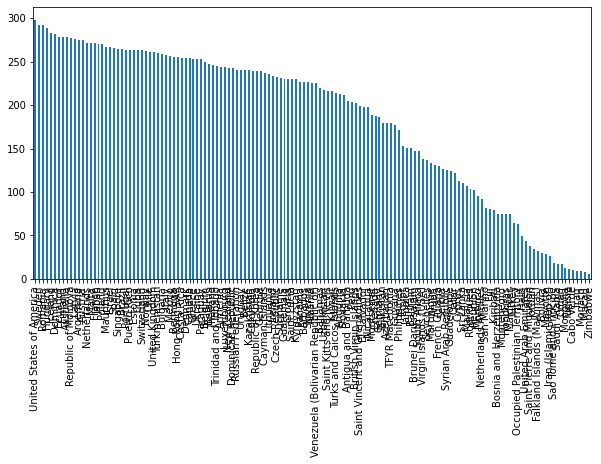

In [79]:
pd.value_counts(train['country']).plot.bar()

<AxesSubplot:>

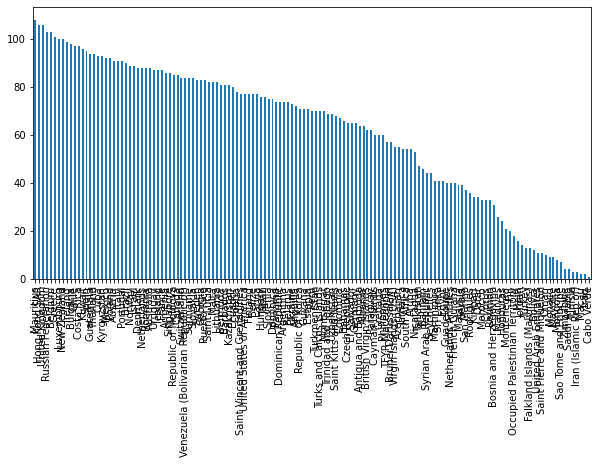

In [80]:
pd.value_counts(validate['country']).plot.bar()

<AxesSubplot:>

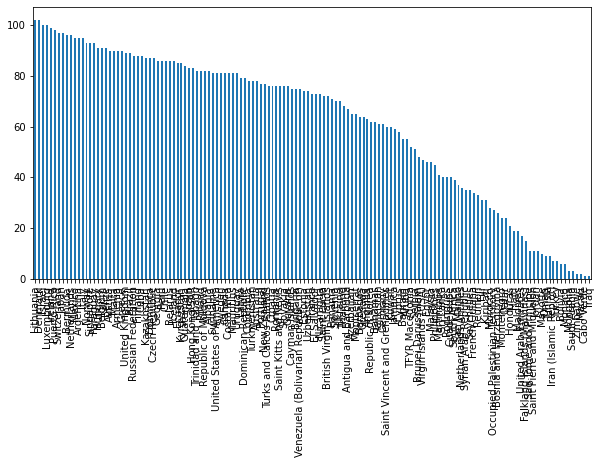

In [81]:
pd.value_counts(test['country']).plot.bar()

In [82]:
train

country  year     sex          age  suicides_no  \
10289                   Cuba  1993  female    75+ years         84.0   
18495                Hungary  2004  female   5-14 years          2.0   
1930                   Aruba  1987    male  55-74 years          0.0   
20315                  Italy  2001    male    75+ years        560.0   
15269                Georgia  1993  female    75+ years          NaN   
...                      ...   ...     ...          ...          ...   
35206              Singapore  1981    male  55-74 years         18.0   
33416  Saint Kitts and Nevis  1987    male  35-54 years          0.0   
7622                Bulgaria  2011  female  35-54 years         41.0   
37277               Suriname  1982  female    75+ years          1.0   
13448            El Salvador  2014    male  35-54 years         85.0   

       population  
10289    208800.0  
18495    544457.0  
1930       3118.0  
20315   1675192.0  
15269    133600.0  
...           ...  
35206    108600.0  
33416         NaN  
7622    1036483.0  
37277      3100.0  
13448    586412.0  

[26265 rows x 6 columns]

In [ ]:
# Zadanie 4
# Wydaje mi sie ze w moim zbiorze nie jest wymagania zadna normalizacja danych.

In [93]:
# zadanie 5
print(train.isnull().sum())
print(validate.isnull().sum())
print(test.isnull().sum())

country           0
year              0
sex               0
age               0
suicides_no    1346
population     3282
dtype: int64
country           0
year              0
sex               0
age               0
suicides_no     456
population     1048
dtype: int64
country           0
year              0
sex               0
age               0
suicides_no     454
population     1130
dtype: int64


In [94]:
train.dropna(inplace=True)
validate.dropna(inplace=True)
test.dropna(inplace=True)

In [95]:
print(train)
print(validate)
print(test)

             country  year     sex          age  suicides_no  population
10289           Cuba  1993  female    75+ years         84.0    208800.0
18495        Hungary  2004  female   5-14 years          2.0    544457.0
1930           Aruba  1987    male  55-74 years          0.0      3118.0
20315          Italy  2001    male    75+ years        560.0   1675192.0
23505     Luxembourg  1984    male   5-14 years          0.0     22100.0
...              ...   ...     ...          ...          ...         ...
18031  Hong Kong SAR  2002    male  25-34 years        145.0    487800.0
35206      Singapore  1981    male  55-74 years         18.0    108600.0
7622        Bulgaria  2011  female  35-54 years         41.0   1036483.0
37277       Suriname  1982  female    75+ years          1.0      3100.0
13448    El Salvador  2014    male  35-54 years         85.0    586412.0

[21637 rows x 6 columns]
            country  year     sex          age  suicides_no  population
19952        Israel  2009 